In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.append('..')
from data_tools import audio_files_to_numpy, numpy_audio_to_matrix_spectrogram
from data_display import make_3plots_spec_voice_noise, make_3plots_timeseries_voice_noise
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import IPython.display as ipd 
pred_path = "/home/le/Downloads/nlp_workspace/NLP_Workspace/Audio/Gender_Classification/Denoise/20210606011544-30f13a6b-b2e9-4fc0-b68b-e1b91e5f3044-0006_0.wav"
org_path = "/home/le/Downloads/nlp_workspace/NLP_Workspace/Audio/Gender_Classification/Audio_file/4.wav"
sr = 8000
frame_length = 8064

# hop length for clean voice files separation (no overlap)
hop_length_frame = 8064

# Choosing n_fft and hop_length_fft to have squared spectrograms
n_fft = 255
hop_length_fft = 63

dim_square_spec = int(n_fft / 2) + 1

In [2]:
pred = librosa.load(pred_path,sr = sr)[0]
ipd.Audio(pred_path, rate=sr)



In [68]:
org = librosa.load(org_path,sr = sr)[0]
ipd.Audio(org_path, rate=sr)

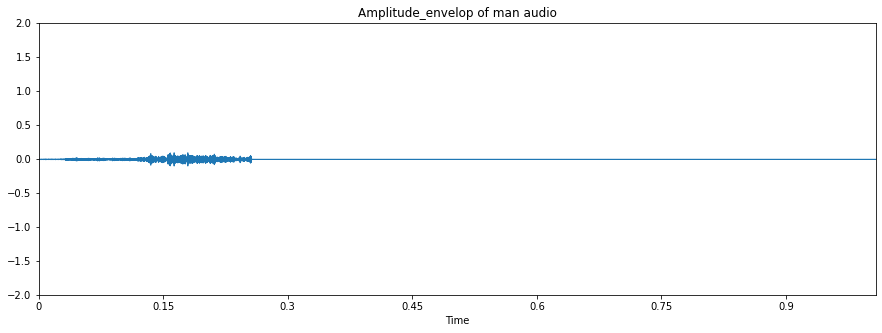

In [4]:
plt.figure(figsize=(15,5))

# plt.plot(t, ae_man, color="r")
plt.ylim((-2, 2))
plt.title("Amplitude_envelop of man audio")
librosa.display.waveplot(pred,sr=sr, x_axis='time')
# print(org.shape)

(16128,)


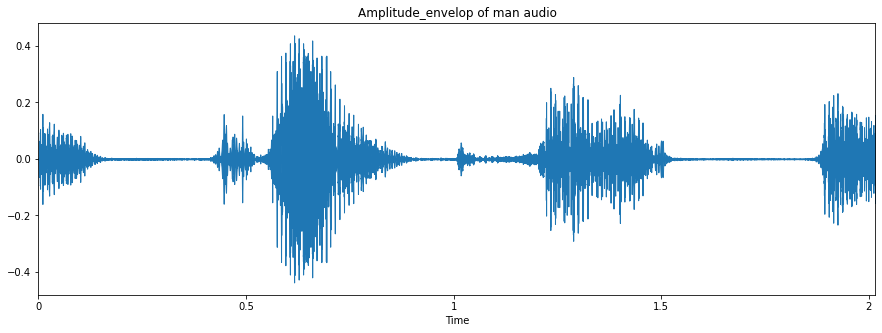

In [54]:
plt.figure(figsize=(15,5))

# plt.plot(t, ae_man, color="r")
# plt.ylim((-1, 1))
plt.title("Amplitude_envelop of man audio")
librosa.display.waveplot(pred,sr=sr, x_axis='time')
print(pred.shape)

[         nan          nan          nan          nan          nan
          nan 190.41804342 187.14677541 184.99721136 206.45635927
 206.45635927 227.75828325 222.55627687 210.06515286          nan
          nan          nan          nan 298.79793764 297.07698816
 297.07698816 410.53451628 408.17001145 447.69106453 547.99783384
 526.28229356 234.43211036 223.84553226 297.07698816 337.33223583
 325.8414615  320.24370023] [False False False False False False  True  True  True  True  True  True
  True  True False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True] [2.61680286e-02 6.60815127e-02 4.06973316e-02 1.50855873e-02
 1.00090255e-02 1.06226090e-02 1.14223343e-02 3.01068618e-02
 1.00267247e-02 1.08579771e-01 2.79605165e-01 2.40754394e-01
 2.03176286e-02 1.08579771e-01 1.00012330e-02 1.00001278e-02
 1.96563284e-13 1.00000000e-02 1.10857919e-02 6.60815127e-02
 1.08579771e-01 3.72135898e-01 6.15949885e-01 1.00012330e-02
 5.60713954e-0

<Figure size 432x288 with 0 Axes>

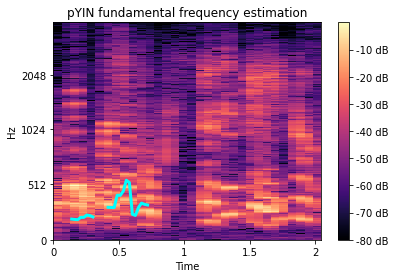

<Figure size 432x288 with 0 Axes>

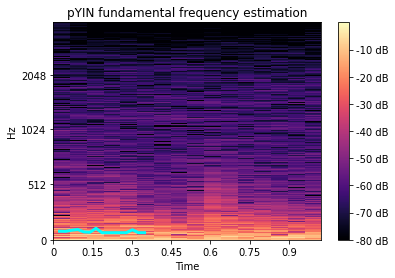

<Figure size 432x288 with 0 Axes>

In [69]:
fig, ax = plt.subplots()

D = librosa.stft(pred)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
f0, voiced_flag, voiced_probs = librosa.pyin(pred, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'),sr = 8000)
times = librosa.times_like(f0)
print(f0, voiced_flag, voiced_probs)
img = librosa.display.specshow(S_db, x_axis='time',
                         y_axis='mel', sr=8000,
                        ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='pYIN fundamental frequency estimation')
# fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
plt.figure()
# librosa.display.specshow(S_db)
# plt.colorbar()



fig, ax = plt.subplots()

D = librosa.stft(org)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
f0, voiced_flag, voiced_probs = librosa.pyin(org, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'),sr = 8000)
times = librosa.times_like(f0)
print(f0, voiced_flag, voiced_probs)
img = librosa.display.specshow(S_db, x_axis='time',
                         y_axis='mel', sr=8000,
                        ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='pYIN fundamental frequency estimation')
# fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
plt.figure()

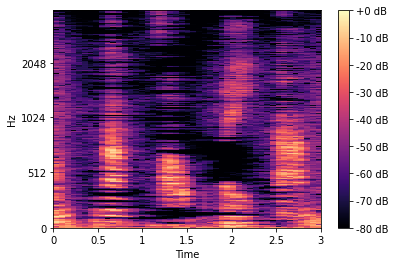

In [56]:
import noisereduce as nr
denoise = nr.reduce_noise(audio_clip=org,noise_clip=org, verbose=False) 
fig, ax = plt.subplots()

D = librosa.stft(denoise)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
img = librosa.display.specshow(S_db, x_axis='time',
                         y_axis='mel', sr=8000,
                        ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
